## **Implemention of The Principal Component Analysis (PCA)**

---
### Fruit Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

df = pd.read_table('Dataset/fruit.txt')
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [3]:
X = df[["mass", "width", "height", "color_score"]].to_numpy()
y = df.fruit_name.to_numpy()

In [5]:
# standadize data
A = X - X.mean(axis = 0)
# decompose A 
U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (59, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [6]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [7]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


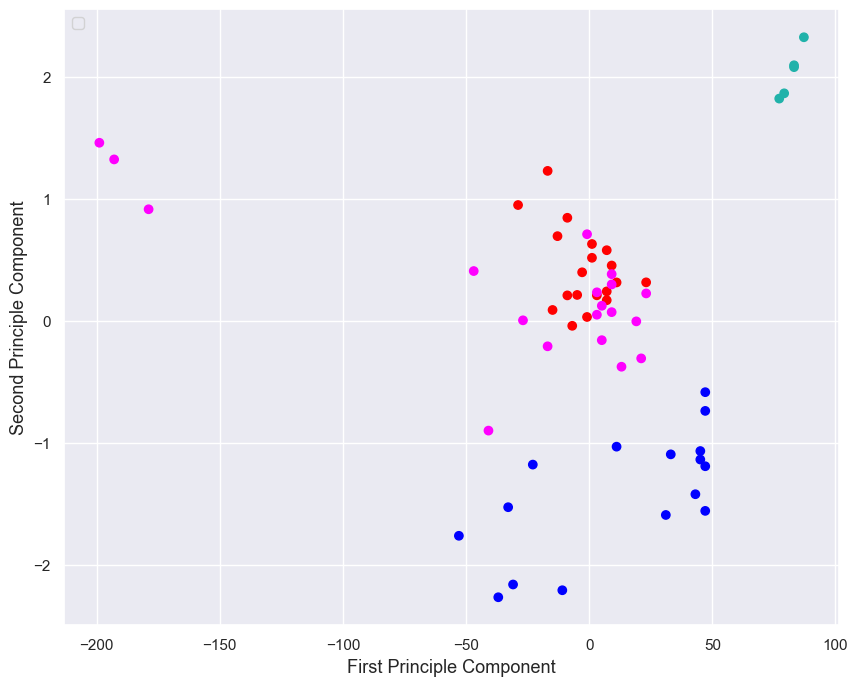

In [17]:
def colors(y):
    if y == "apple":
        return "red"
    elif y == "orange":
        return "magenta"
    elif y == "lemon":
        return "blue"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 13)
plt.ylabel("Second Principle Component", fontsize = 13)
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.57845054 0.25650171 0.14402362 0.02102413]
per_var = [57.85 25.65 14.4   2.1 ] 



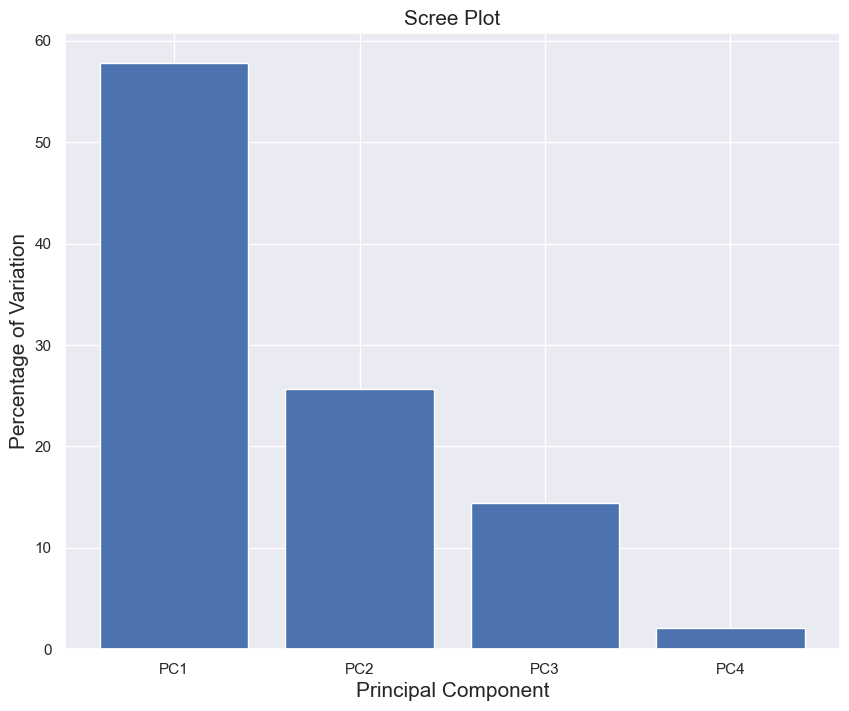

In [11]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

In [12]:
features = list(set(["mass", "width", "height", "color_score"]) - {"fruit_name"})
pd.DataFrame(data = pca.components_, columns = labels, index = features)

,PC1,PC2,PC3,PC4
height,0.626413,0.577999,0.496267,-0.165052
mass,0.195381,0.254802,-0.238567,0.916509
width,0.101064,0.472505,-0.797815,-0.360579
color_score,0.747809,-0.614599,-0.245553,-0.052468


In [18]:
pca_data = pca.transform(scaled_X)
pca_df = pd.DataFrame(pca_data, columns = labels)
projected_df = pd.concat([pca_df, df.fruit_name], axis = 1)
projected_df["color"] = c
projected_df.head(5)

,PC1,PC2,PC3,PC4,fruit_name,color
0,1.572169,-1.980044,2.048688,-0.368504,apple,red
1,0.878417,-1.579373,1.899455,-0.166053,apple,red
2,0.529773,-1.732891,1.258227,0.154708,apple,red
3,-2.712610,0.414674,0.923164,0.148685,mandarin,lightseagreen
4,-2.893412,0.242003,0.909229,0.298106,mandarin,lightseagreen


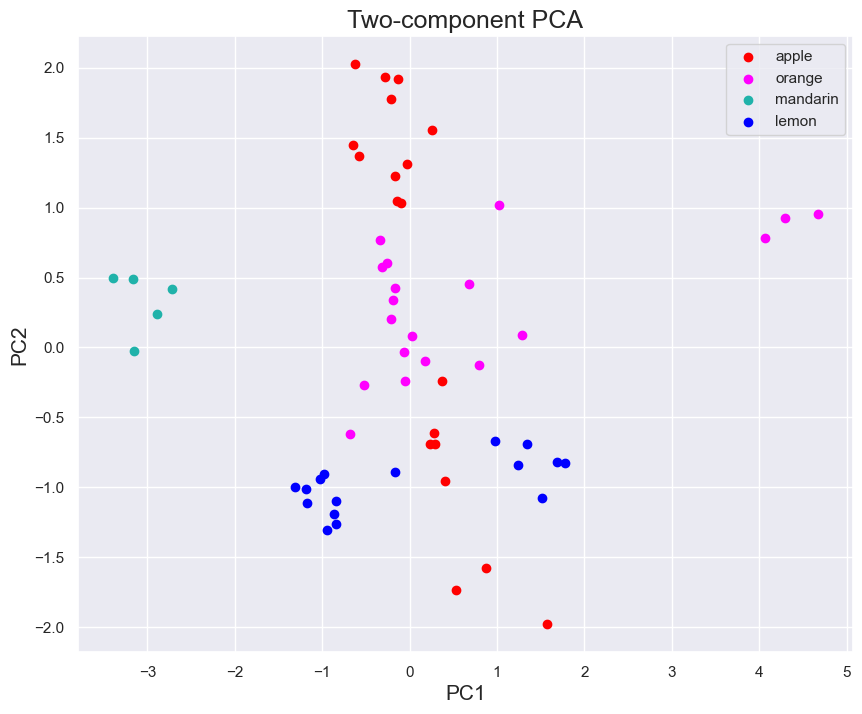

In [19]:
targets = ["apple", "orange", "mandarin", "lemon"]
colors = ["red", "magenta", "lightseagreen", "blue"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['fruit_name'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()